In [1]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

(60000, 28, 28)
(10000, 28, 28)


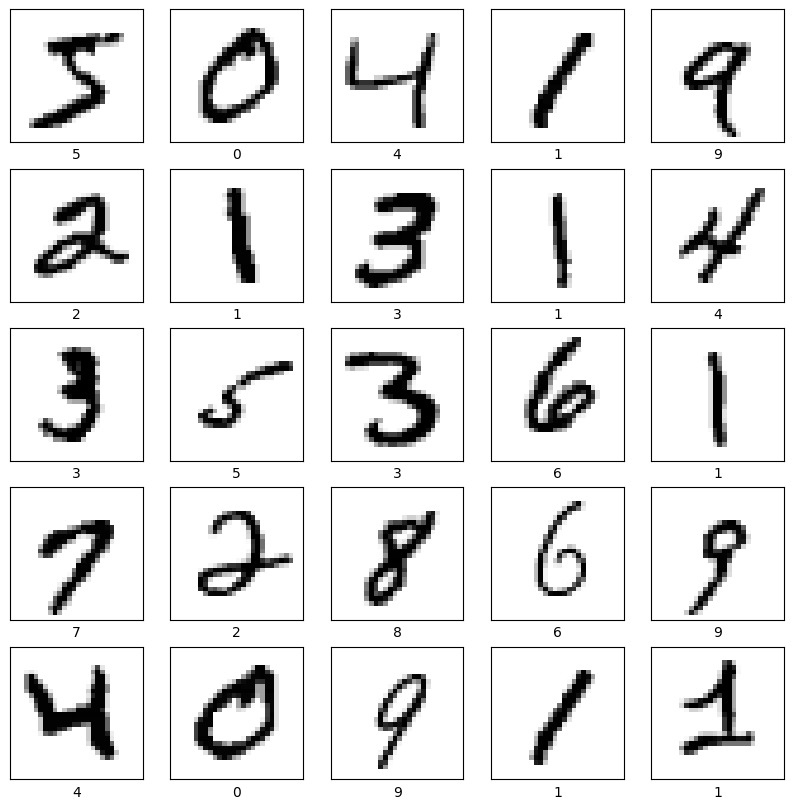

In [2]:
mnist = tensorflow.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train/255.0
x_test = x_test/255.0

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(str(y_train[i]))
plt.show()

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units= 128, activation='relu'),
    Dense(units= 64, activation='relu'),
    Dense(units= 32, activation='relu'),
    Dense(units= 10, activation='softmax')

])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 4ms/step - loss: 0.1569 - accuracy: 0.9525
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0528 - accuracy: 0.9838
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9884
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9906
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9931
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0164 - accuracy: 0.9949
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0148 - accuracy: 0.9957
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

313/313 [==============================] - 1s 2ms/step


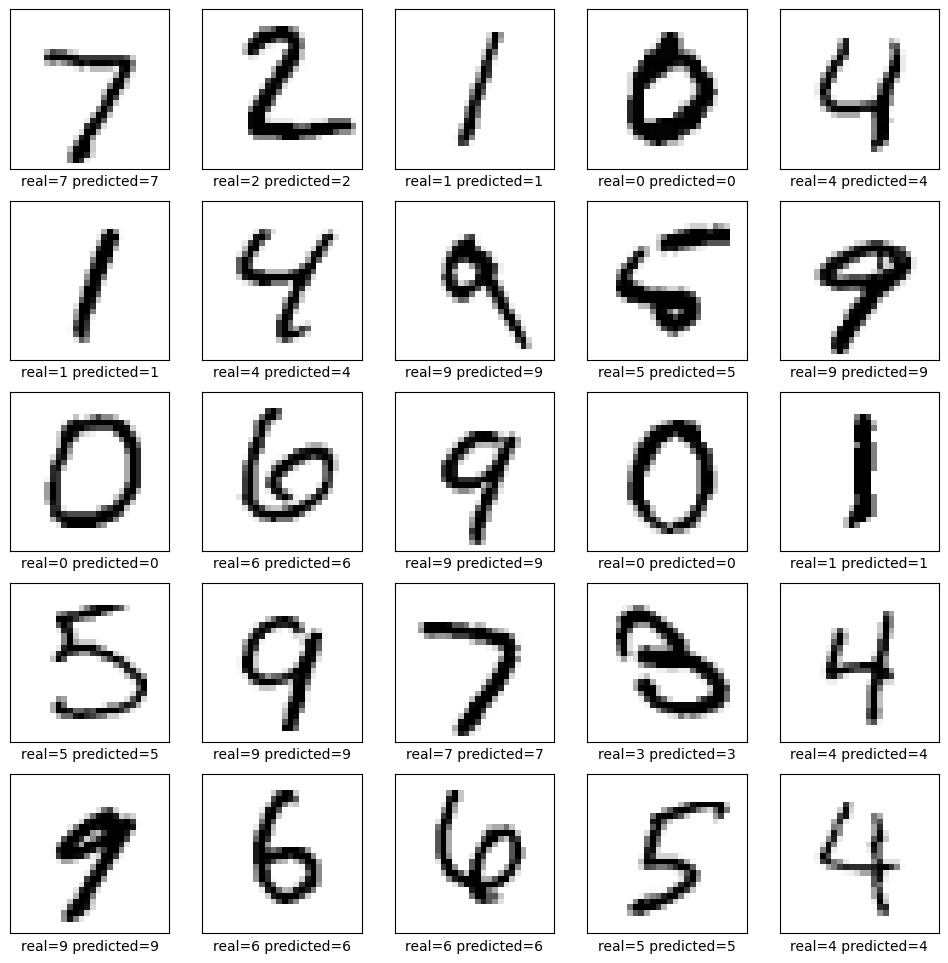

In [10]:
predict = model.predict(x_test)
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel('real=' + str(y_test[i]) + ' predicted=' + str(np.argmax(predict[i])))
plt.show()

In [11]:
out = model.evaluate(x_test, y_test)

print("Model Accuracy: %.4f" %out[1])
print("Model loss: %.4f" %out[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9896
Model Accuracy: 0.9896
Model loss: 0.0738
